In [1]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from imblearn.over_sampling import RandomOverSampler

In [2]:
cols = ['fLength', 'fWidth', 'fSize', 'fConc', 'fConc1', 'fAsym', 'fM3Long', 'fM3Trans', 'fAlpha', 'fDist', 'class']
df = pd.read_csv('magic04.data', names=cols)
df.head()


,fLength,fWidth,fSize,fConc,fConc1,fAsym,fM3Long,fM3Trans,fAlpha,fDist,class
0,28.7967,16.0021,2.6449,0.3918,0.1982,27.7004,22.0110,-8.2027,40.0920,81.8828,g
1,31.6036,11.7235,2.5185,0.5303,0.3773,26.2722,23.8238,-9.9574,6.3609,205.2610,g
2,162.0520,136.0310,4.0612,0.0374,0.0187,116.7410,-64.8580,-45.2160,76.9600,256.7880,g
3,23.8172,9.5728,2.3385,0.6147,0.3922,27.2107,-6.4633,-7.1513,10.4490,116.7370,g
4,75.1362,30.9205,3.1611,0.3168,0.1832,-5.5277,28.5525,21.8393,4.6480,356.4620,g


In [3]:
df['class'] = df['class'].map({'g':0, 'h':1})
df.head()

,fLength,fWidth,fSize,fConc,fConc1,fAsym,fM3Long,fM3Trans,fAlpha,fDist,class
0,28.7967,16.0021,2.6449,0.3918,0.1982,27.7004,22.0110,-8.2027,40.0920,81.8828,0
1,31.6036,11.7235,2.5185,0.5303,0.3773,26.2722,23.8238,-9.9574,6.3609,205.2610,0
2,162.0520,136.0310,4.0612,0.0374,0.0187,116.7410,-64.8580,-45.2160,76.9600,256.7880,0
3,23.8172,9.5728,2.3385,0.6147,0.3922,27.2107,-6.4633,-7.1513,10.4490,116.7370,0
4,75.1362,30.9205,3.1611,0.3168,0.1832,-5.5277,28.5525,21.8393,4.6480,356.4620,0


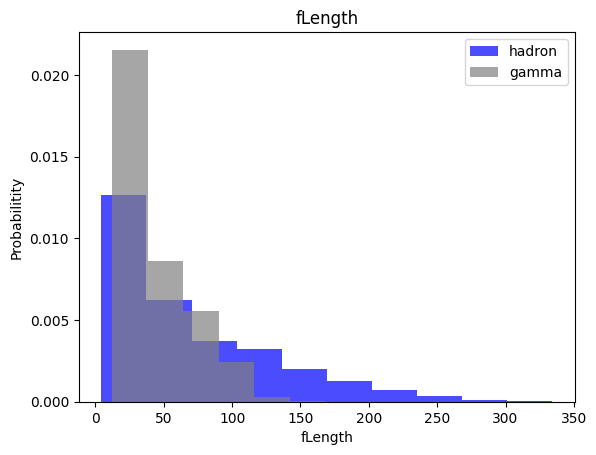

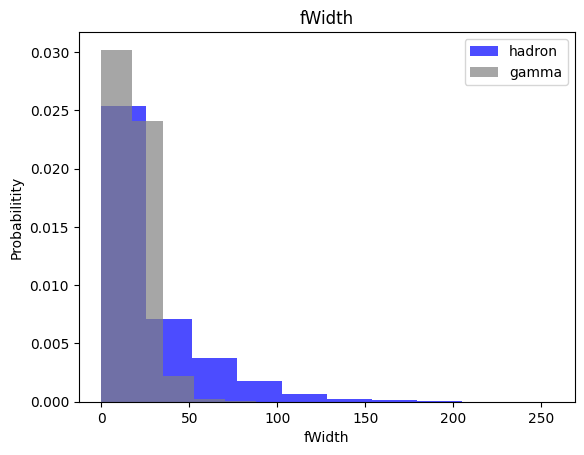

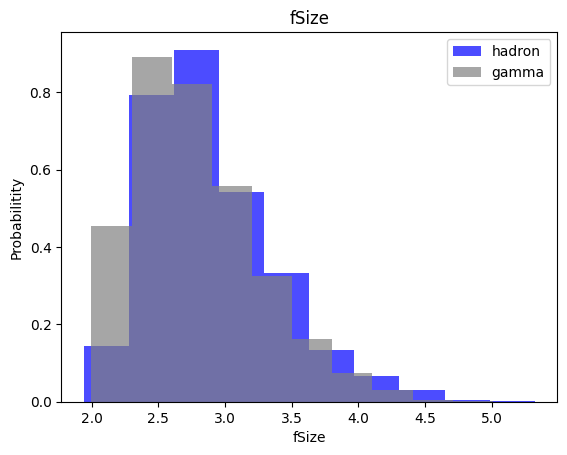

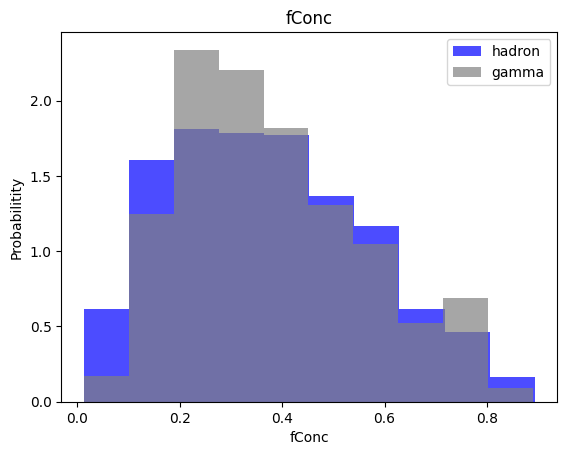

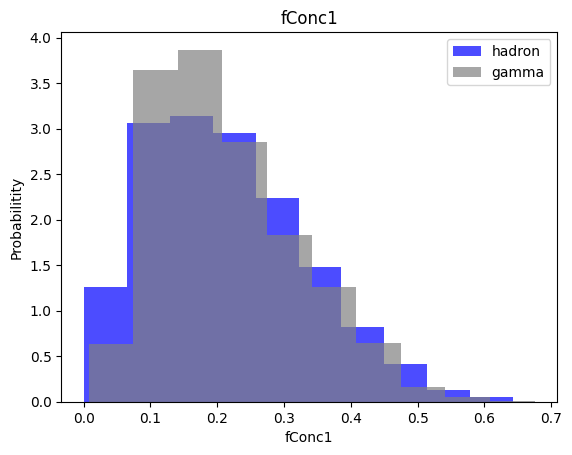

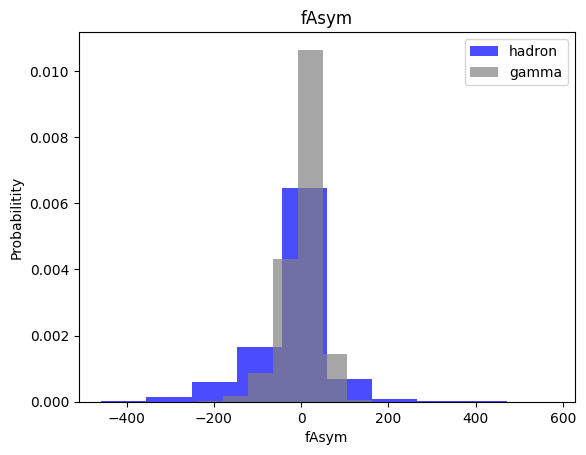

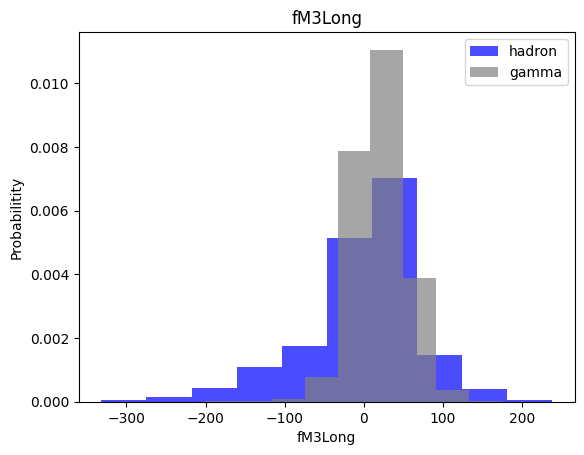

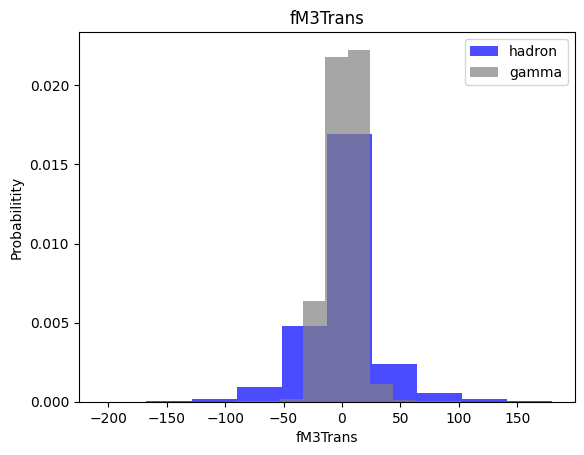

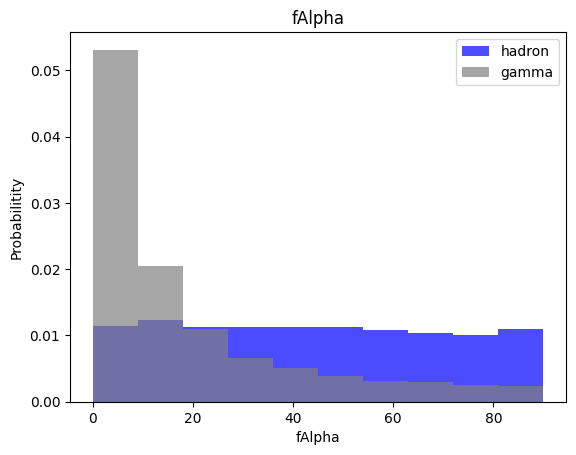

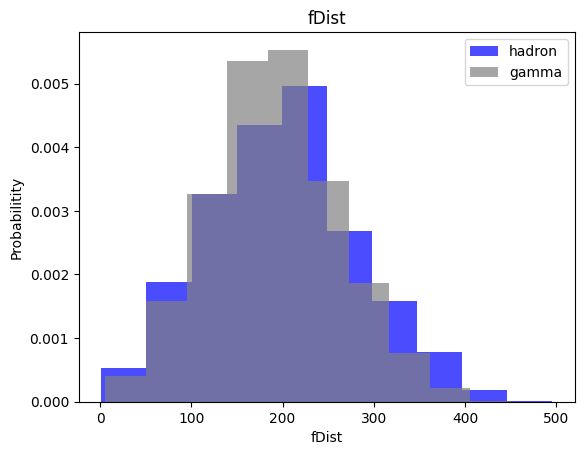

In [4]:
for label in cols[:-1]:
    plt.hist(df[df['class']==1][label], color='blue', label='hadron', alpha=0.7,density=True)
    plt.hist(df[df['class']==0][label], color='gray', label='gamma', alpha=0.7,density=True)
    plt.title(label)
    plt.ylabel('Probabilitity')
    plt.xlabel(label) 
    plt.legend()
    plt.show()  

In [5]:
train,  valid, test = np.split(df.sample(frac=1), [int(0.6*len(df)), int(0.8*len(df))])

/home/juancarlos/.local/lib/python3.13/site-packages/numpy/_core/fromnumeric.py:57: FutureWarning: 'DataFrame.swapaxes' is deprecated and will be removed in a future version. Please use 'DataFrame.transpose' instead.
  return bound(*args, **kwds)


In [6]:
def scale_dataset(dataframe, oversample=False):
    X = dataframe[dataframe.columns[:-1]].values
    y = dataframe[dataframe.columns[-1]].values
                  
    scaler = StandardScaler()
    X = scaler.fit_transform(X)

    if oversample:
        ros = RandomOverSampler()
        X, y = ros.fit_resample(X, y)

    data = np.hstack((X,np.reshape(y, (-1,1))))
    return data, X, y

In [7]:
train, X_train, y_train = scale_dataset(train, oversample=True)
valid, X_valid, y_valid = scale_dataset(valid, oversample=False)
test, X_test, y_test = scale_dataset(test, oversample=False)

# Using kNN Model


In [8]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report

In [9]:
kNN_model = KNeighborsClassifier(n_neighbors=1)
kNN_model.fit(X_train, y_train)


,n_neighbors,1
,weights,'uniform'
,algorithm,'auto'
,leaf_size,30
,p,2
,metric,'minkowski'
,metric_params,None
,n_jobs,None


In [10]:
y_pred = kNN_model.predict(X_test)

In [11]:
y_pred, y_test


(array([0, 0, 0, ..., 0, 0, 0], shape=(3804,)),
 array([0, 0, 0, ..., 0, 0, 0], shape=(3804,)))

In [12]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.83      0.88      0.85      2422
           1       0.77      0.68      0.72      1382

    accuracy                           0.81      3804
   macro avg       0.80      0.78      0.79      3804
weighted avg       0.80      0.81      0.80      3804



# Naive Bayes

In [13]:
from sklearn.naive_bayes import GaussianNB

In [14]:
NB_model = GaussianNB()
NB_model.fit(X_train, y_train)


,priors,None
,var_smoothing,1e-09


In [15]:
y_pred = NB_model.predict(X_test)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.72      0.89      0.80      2422
           1       0.68      0.40      0.50      1382

    accuracy                           0.71      3804
   macro avg       0.70      0.65      0.65      3804
weighted avg       0.71      0.71      0.69      3804



# Log Reg

In [16]:
from sklearn.linear_model import LogisticRegression

In [17]:
lg_model = LogisticRegression()
lg_model.fit(X_train, y_train)

,penalty,'l2'
,dual,False
,tol,0.0001
,C,1.0
,fit_intercept,True
,intercept_scaling,1
,class_weight,None
,random_state,None
,solver,'lbfgs'
,max_iter,100
,multi_class,'deprecated'


In [18]:
y_pred = lg_model.predict(X_test)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.84      0.83      0.83      2422
           1       0.71      0.72      0.71      1382

    accuracy                           0.79      3804
   macro avg       0.77      0.77      0.77      3804
weighted avg       0.79      0.79      0.79      3804



# Support vector machines

In [19]:
from sklearn.svm import SVC

In [20]:
svm_model = SVC()
svm_model.fit(X_train, y_train)

,C,1.0
,kernel,'rbf'
,degree,3
,gamma,'scale'
,coef0,0.0
,shrinking,True
,probability,False
,tol,0.001
,cache_size,200
,class_weight,None
,verbose,False


In [21]:
y_pred = svm_model.predict(X_test)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.89      0.92      0.90      2422
           1       0.84      0.79      0.82      1382

    accuracy                           0.87      3804
   macro avg       0.87      0.85      0.86      3804
weighted avg       0.87      0.87      0.87      3804



# Neural Net


In [22]:
import tensorflow as tf

2025-12-15 12:01:14.340959: I external/local_xla/xla/tsl/cuda/cudart_stub.cc:31] Could not find cuda drivers on your machine, GPU will not be used.
2025-12-15 12:01:14.347940: I tensorflow/core/util/port.cc:153] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2025-12-15 12:01:15.147803: I tensorflow/core/platform/cpu_feature_guard.cc:210] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 AVX512F AVX512_VNNI FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2025-12-15 12:01:19.784681: I tensorflow/core/util/port.cc:153] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To tur

In [23]:
def plot_history(history):
    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 4))
    ax1.plot(history.history['loss'], label='loss')
    ax1.plot(history.history['val_loss'], label='val_loss')
    ax1.set_xlabel('Epoch')
    ax1.set_ylabel('BinaryCrossEntropy')
    ax1.grid()
    ax1.legend()
    
    ax2.plot(history.history['accuracy'], label='aaccuracy')
    ax2.plot(history.history['val_accuracy'], label='val_accuracy')
    ax2.set_xlabel('Epoch')
    ax2.set_ylabel('Accuracy')
    ax2.grid()
    ax2.legend()
    
    plt.show()


In [24]:
def train_model(X_train, y_train, num_nodes, dropout_prob, lr, batch_size, epochs):
    nn_model = tf.keras.Sequential([
        tf.keras.layers.Dense(num_nodes, activation='relu', input_shape=(10,)),
        tf.keras.layers.Dropout(dropout_prob),
        tf.keras.layers.Dense(num_nodes, activation='relu'),
        tf.keras.layers.Dropout(dropout_prob),
        tf.keras.layers.Dense(1, activation='sigmoid')
    ])

    nn_model.compile(optimizer=tf.optimizers.Adam(learning_rate=lr), loss = 'binary_crossentropy', metrics=['accuracy'])
    
    history = nn_model.fit(X_train, y_train, epochs=epochs, batch_size=batch_size, validation_split=0.2, verbose=0)
    return nn_model, history   

In [ ]:
least_val_loss = float('inf')
least_loss_model = None

epochs = 50
for num_nodes in [16, 32]:
    for dropout_prob in [0.0, 0.2]:
        for lr in [0.2, 0.1]:
            for batch_size in [16, 32]:
                print(f"num nodes {num_nodes}, dropout {dropout_prob}, lr {lr}, batch size {batch_size}")
                model, history = train_model(X_train, y_train, num_nodes, dropout_prob, lr, batch_size, epochs)
                plot_history(history)
                val_loss = model.evaluate(X_valid, y_valid)[0]
                if val_loss < least_val_loss:
                    least_val_loss = val_loss
                    least_loss_model = model

num nodes 64, dropout 0.2, lr 0.001, batch size 128


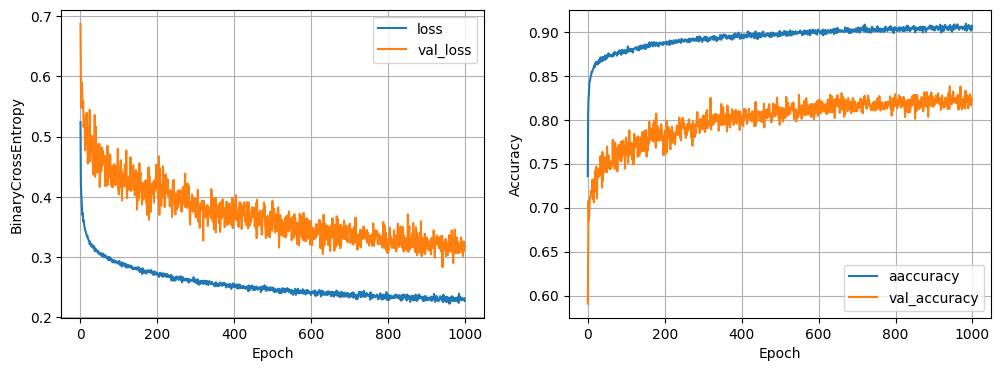

119/119 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.8856 - loss: 0.2899


In [26]:
least_val_loss = float('inf')
least_loss_model = None

num_nodes = 64
dropout_prob = 0.2
lr = 0.001
batch_size = 128
epochs = 1000
print(f"num nodes {num_nodes}, dropout {dropout_prob}, lr {lr}, batch size {batch_size}")
model, history = train_model(X_train, y_train, num_nodes, dropout_prob, lr, batch_size, epochs)
plot_history(history)
val_loss = model.evaluate(X_valid, y_valid)[0]
if val_loss < least_val_loss:
    least_val_loss = val_loss
    least_loss_model = model

In [28]:
y_pred = least_loss_model.predict(X_test)
y_pred = (y_pred > 0.5).astype(int).reshape(-1)
print(y_pred, y_test)


119/119 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step
[0 0 0 ... 0 0 0] [0 0 0 ... 0 0 0]


In [29]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.87      0.95      0.91      2422
           1       0.90      0.74      0.81      1382

    accuracy                           0.88      3804
   macro avg       0.88      0.85      0.86      3804
weighted avg       0.88      0.88      0.87      3804



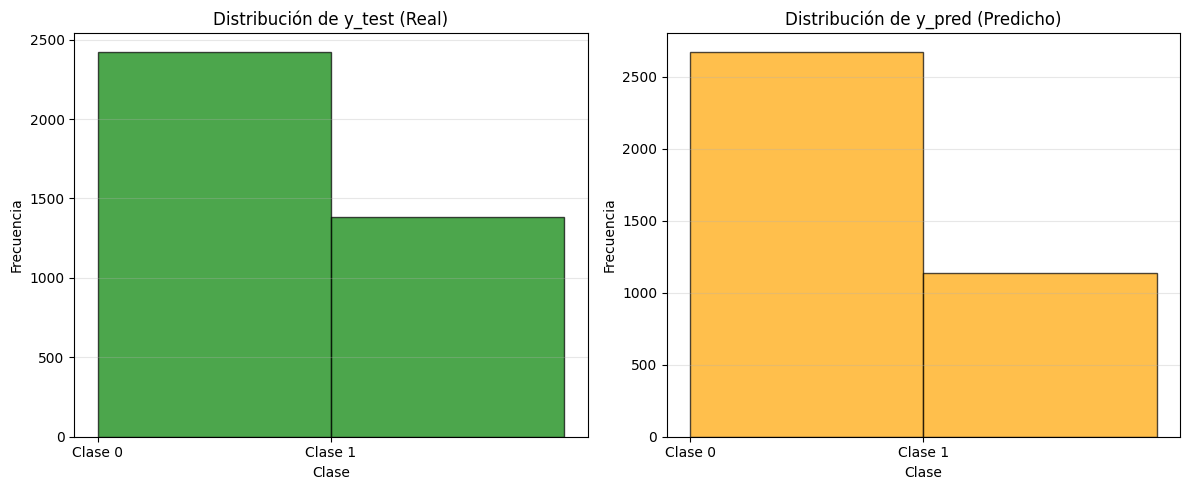

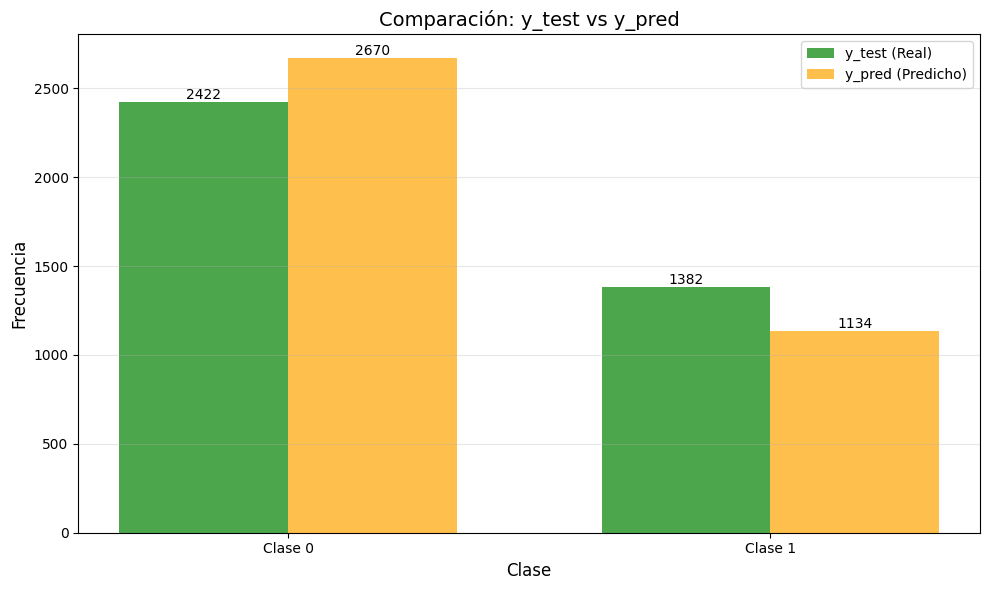

In [30]:
# Visualizar comparación de y_test vs y_pred con histogramas
fig, axes = plt.subplots(1, 2, figsize=(12, 5))

# Histograma de y_test
axes[0].hist(y_test, bins=[0, 1, 2], color='green', alpha=0.7, edgecolor='black')
axes[0].set_xlabel('Clase')
axes[0].set_ylabel('Frecuencia')
axes[0].set_title('Distribución de y_test (Real)')
axes[0].set_xticks([0, 1])
axes[0].set_xticklabels(['Clase 0', 'Clase 1'])
axes[0].grid(axis='y', alpha=0.3)

# Histograma de y_pred
axes[1].hist(y_pred, bins=[0, 1, 2], color='orange', alpha=0.7, edgecolor='black')
axes[1].set_xlabel('Clase')
axes[1].set_ylabel('Frecuencia')
axes[1].set_title('Distribución de y_pred (Predicho)')
axes[1].set_xticks([0, 1])
axes[1].set_xticklabels(['Clase 0', 'Clase 1'])
axes[1].grid(axis='y', alpha=0.3)

plt.tight_layout()
plt.show()

# Comparación lado a lado con barplot
labels = ['Clase 0', 'Clase 1']
x = np.arange(len(labels))
width = 0.35

counts_test = [np.sum(y_test == 0), np.sum(y_test == 1)]
counts_pred = [np.sum(y_pred == 0), np.sum(y_pred == 1)]

fig, ax = plt.subplots(figsize=(10, 6))
bars1 = ax.bar(x - width/2, counts_test, width, label='y_test (Real)', color='green', alpha=0.7)
bars2 = ax.bar(x + width/2, counts_pred, width, label='y_pred (Predicho)', color='orange', alpha=0.7)

ax.set_xlabel('Clase', fontsize=12)
ax.set_ylabel('Frecuencia', fontsize=12)
ax.set_title('Comparación: y_test vs y_pred', fontsize=14)
ax.set_xticks(x)
ax.set_xticklabels(labels)
ax.legend()
ax.grid(axis='y', alpha=0.3)

# Agregar valores en las barras
for bars in [bars1, bars2]:
    for bar in bars:
        height = bar.get_height()
        ax.text(bar.get_x() + bar.get_width()/2., height,
                f'{int(height)}',
                ha='center', va='bottom', fontsize=10)

plt.tight_layout()
plt.show()